In [50]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

In [51]:
#데이터 읽기데이터 읽기
wine = pd.read_csv('winequality-red.csv')
# 데이터 사본 https://goo.gl/m3eCrf

In [52]:
#읽어온 데이터 처음 5개 불러오기#읽어온 데이터 처음 5개 불러오기
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
#읽어온 데이터의 shape 출력 1599개 row, 12개 feature
wine.shape

(1599, 12)

In [54]:
wine.info() # 데이터 정보

#각 feature의 번호 와 데이터 타입을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
#wine 데이터의 feature 이름들을 출력한다.
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free sulfur dioxide'),
  Text(7, 0, 'total sulfur dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality')])

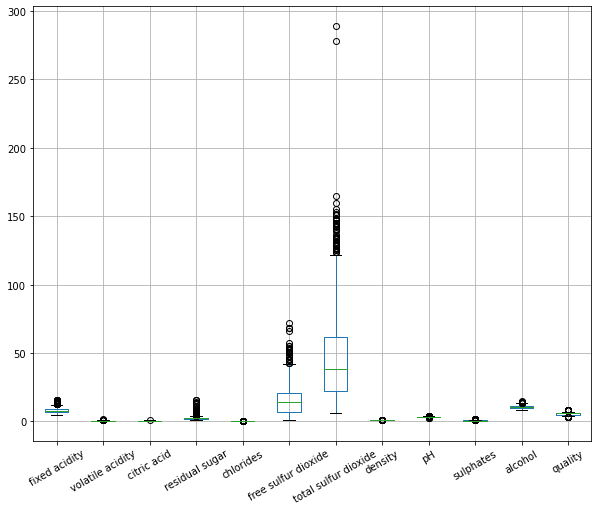

In [56]:
#맨처음에 박스플롯을 그린다 거의 한눈에 다보여주기 때문에
wine.boxplot(figsize = (10,8))
plt.xticks(rotation=30)

#rotation 은 격자 설명란의 거리
# array = feature 개수와 각 부여번호

#free sulfur dioxide, total sulfur dioxde의 값이 너무 높아
# 다른 feature들의 정보를 한눈에 알아보기 어렵다.

<AxesSubplot:>

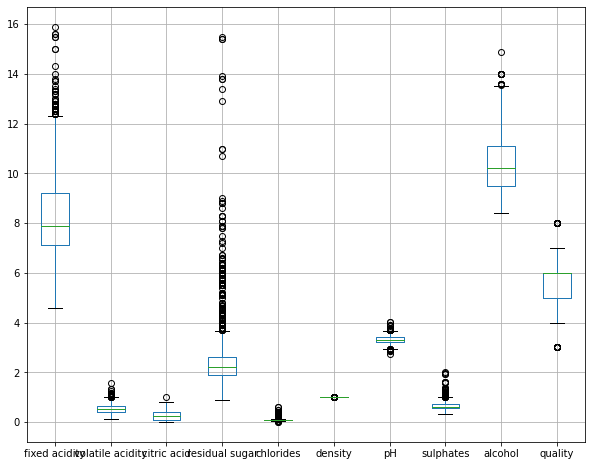

In [57]:
#위에서 크게나온 그림 빼고 다시그림 다른것들을 자세히 보기위해서
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).boxplot(figsize = (10,8))

#free sulfur dioxide, totalsulfur dioxide 를 제외한 나머지 feature의 
#박스플롯을 그린다.
#이제 데이터 값이 한눈에 들어온다.

In [58]:
#alcohol, quality 피쳐의 첫번째 10개 데이터값을 출력한다.

wine[['alcohol', 'quality']].head(10)

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
5,9.4,5
6,9.4,5
7,10.0,7
8,9.5,7
9,10.5,5


<AxesSubplot:>

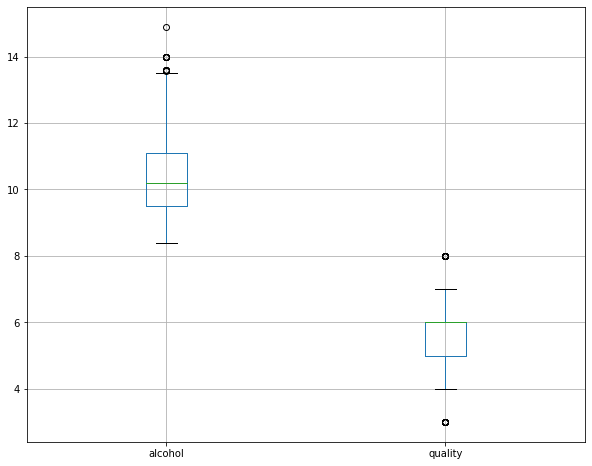

In [59]:
#alcohol, quality 두가지의 값으로만 박스플롯을 그린다.
wine[['alcohol', 'quality']].boxplot(figsize = (10,8))


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

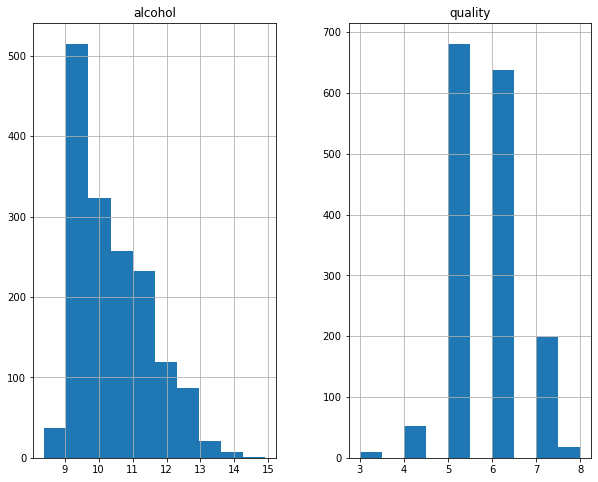

In [60]:
#alcohol, quality의 각각 데이터값으로 히스토그램을 그린다.
wine[['alcohol', 'quality']].hist(figsize = (10,8))

<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>

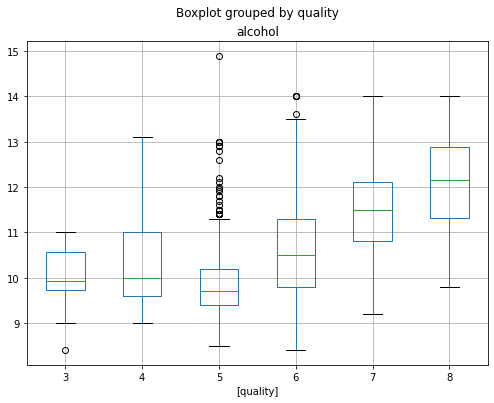

In [61]:
#quality를 기준으로 alcohol과 quality 박스플롯을 그린다.
wine[['alcohol', 'quality']].boxplot(by='quality',figsize = (8,6)) # by값 - 기준
#quality가 좋은건 평균적으로 알코올 성분이 좋다.
#포도주도 알코올이 있는것들을 좋아함

array([<AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
       <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
      dtype=object)

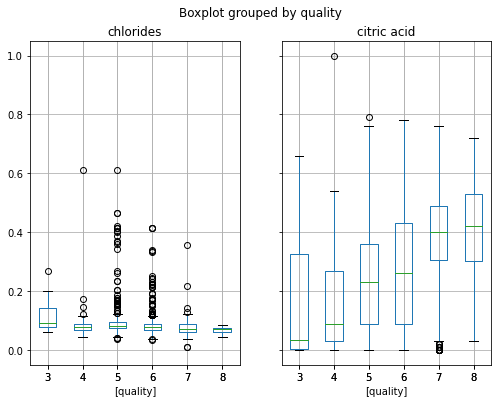

In [62]:
#chlorides : 염화물 , citric acid : 시트르산
#wine 데이터에서 염화물, 시트르산, 퀄리티 를 따로 wine1에 저장한다.
#새로 만든 wine1을 박스플롯하는데 기준은 quality로 그린다.
wine1 = wine[[ 'chlorides', 'citric acid', 'quality']]
wine1.boxplot(by='quality',figsize = (8,6))

array([[<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'fixed acidity'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'pH'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'residual sugar'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>,
        <AxesSubplot:>]], dtype=object)

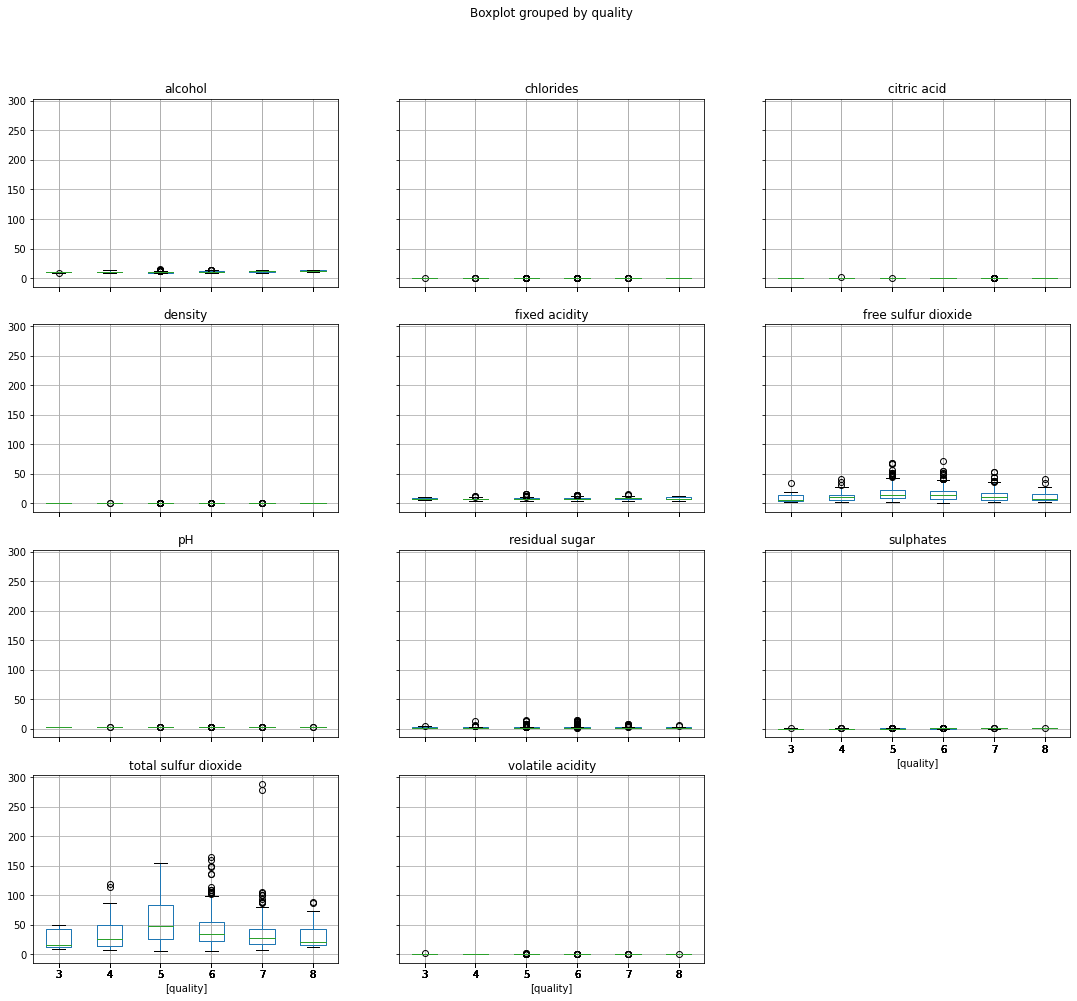

In [63]:
#wine 데이터를 박스플롯으로 그리는데 기준을 quality로 한다.
#즉 11개의 feature들(quality제외)을 모두 quality를 기준으로 박스플롯 그림.
wine.boxplot(by='quality',figsize = (18,16))

#이번에도 역시 free sulfur dioxide, total sulfur dioxide로 인해
#한 눈에 알아보기 어렵다.

array([[<AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'fixed acidity'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'pH'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'residual sugar'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>]],
      dtype=object)

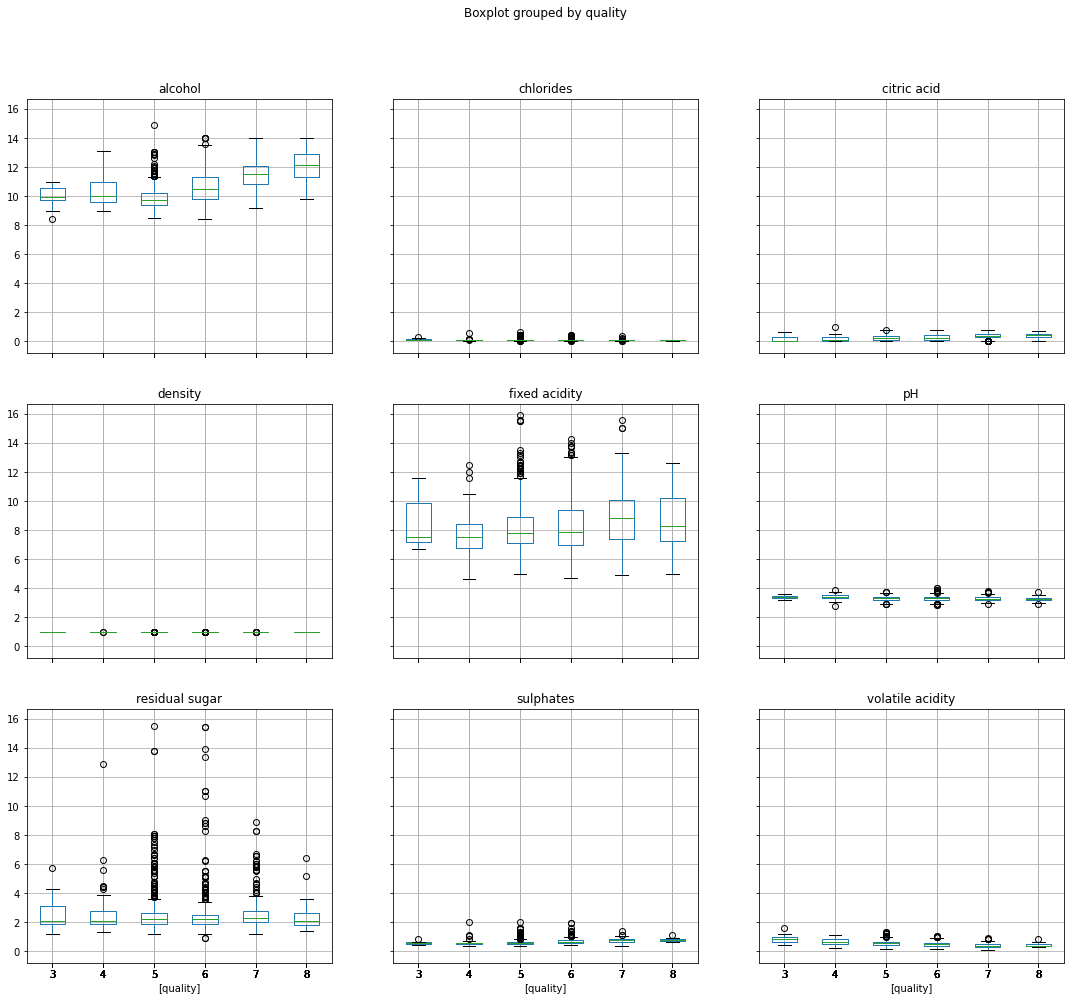

In [64]:
#가장 높은 값을 가지는 free sulfur dioxide, total sulfur dioxide 데이터를 제외한다.
#두 feature를 제외한 나머지 9개 feature의 박스플롯을 퀄리티를 기준으로 그린다.
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).boxplot(by='quality',figsize = (18,16))

# 편차 가 큰 두개의 feature를 제외함으로 다른 값들을 좀 더 알아보기 쉬워졌다.

array([[<AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>,
        <AxesSubplot:>]], dtype=object)

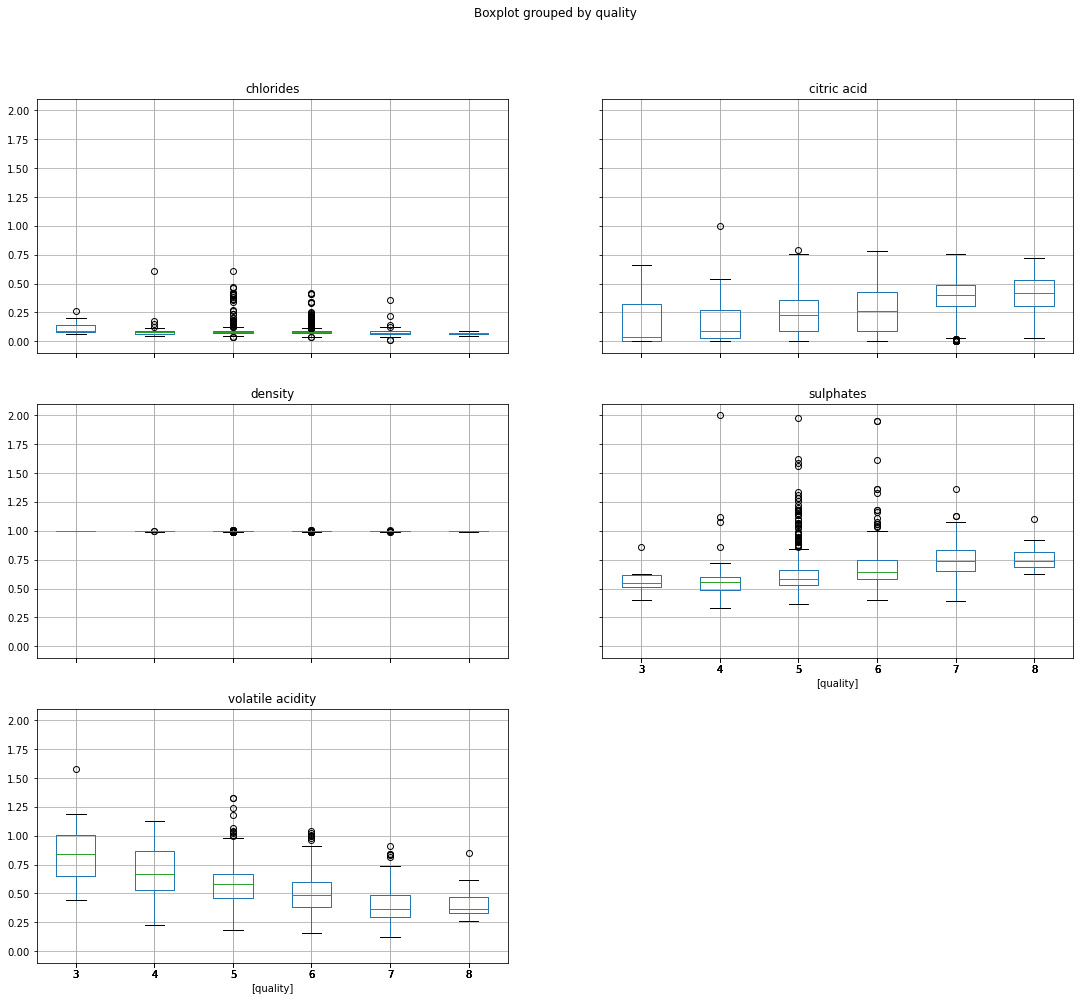

In [65]:
#이번에는 5개의 feature를 제외한 나머지 11개의 feature의 박스플롯을 그린다.
#물론 이번에도 기준은 퀄리티로 박스플롯을 그린다.
wine.drop(['free sulfur dioxide', 'total sulfur dioxide','alcohol','fixed acidity','residual sugar','pH'], axis=1).boxplot(by='quality',figsize = (18,16))

In [66]:
#데이터 전처리

#quality특성이 가지고 있는 값 1개씩만을 np값으로 출력해준다.
#quality 값은 3,4,5,6,7,8 값으로만 이루어져 있음.
#데이터 타입 또한 표시해준다.
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [67]:
#위와 같은 의미를 갖는 문장이다.
wine.quality.unique() 

#wine.pH.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [68]:
#quality 특성이 가지는 유니크한 값들의 빈도수를 출력해준다.(내림차순내림차순)
# 5 -> 681번, 6-> 638번 .....  3 -> 10번

wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [69]:
# 품질이 좋고 나쁜 것을 나누는 기준 설정
# 6.5를 기준으로 bad(0) good(1)으로 나눈다 (임의로 나눈 것임)

#bins 구간을 나눌때 쓴다.(마지막에 8을썼더니 컴퓨터나 8을 뺴버렸다. 그래서 8을 포함시키기 위해 안전하게 8.1을 사용)
bins = (2.9, 6.5, 8.1)

#8만 잡게하면 성능이 좋아진다.

# 0 = bad, 1 = good
group_names = [0, 1]

#cut 함수 2.9 초과 6.5 이하, 6.5 초과 8.1 이하로 범위를 나눠줌
#즉, qual특성을 만들어 주는데
#quality의 값이 2.9~6.5 일떄는 0
#               6.6~8.1 일때는 1의 값을 갖는다.
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [70]:
#qual이라는 feautre가 생성된것을 확인할 수 있다.
# quality의 값이 2.9~6.5 사이 이므로 0의 값을 갖는것 또한 확인할 수 있다.
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [71]:
wine['qual'].value_counts()
# 0 -> 1382 번 즉, quality 2.9~6.5 사이는 1382개
# 1 -> 217  번 즉, quality 6.6~8.1 사이는 217개

0    1382
1     217
Name: qual, dtype: int64

In [72]:
# 예측변수와 레이블을 나눈다
# X 데이터에서는 'quality'와 'qual' 컬럼 제거
# y는 레이블만 담는다

#X_new 는 quality,와 qual 컬럼을 제거한 wine 데이터 값을 갖는다.
X_new = wine.drop(['quality', 'qual'], axis = 1)

# y_는 quality컬럼의 데이터 값을 갖는다.
y_ = wine['quality'] # regression 용

# y는 qual 컬럼의 데이터 값을 갖는다.

X_new = wine.drop(['quality', 'qual'], axis = 1)
y_ = wine['quality'] # regression 용
y = wine['qual']

In [73]:
X_new.head(5)
#quality, qual 컬럼이 삭제된것을 확인할 수 있다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [74]:
y.value_counts()
#y는 qual 컬럼의 데이터 값을 갖고 있다.
#즉, qual의 데이터값 개수를 출력한 것이다.

0    1382
1     217
Name: qual, dtype: int64

표준 스케일링


In [75]:
sc = StandardScaler()
X = sc.fit_transform(X_new)

#fit을 하고 transform을 한번에 한것, 코드를 줄여주기 위해서
#fit은 데이터를 읽고 평균과 시그마를 구한다.
#(하나의 모델을 만듬, 여기에 들어가는 파라미터가 평균과 시그마) -> 스케일링 하기위한 상수구하기
#transform은 실제 값들을 넣어서 나오는 값들
#원래는 데이터를 자체적으로 나눠서 cross valredation을 해야한다. 하지만 지금은 통으로했다.

#X_new = wine데이터에서 qual, quality 컬럼을 뺀 데이터
#X_new데이터를 스케일링 한 것이다. 


In [76]:
# 데이터 프레임에 스케일링 연산을 하면 ndarray로 바뀐다
X[:5]
#X의 11개 컬럼들이 스케일링이 잘 된것을 확인할 수 있다.

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [77]:
X.sum()
#스케일링 된 X의 모든 값을 더해서 출력했다.

-4.888534022029489e-11

In [78]:
# 데이터를 랜덤하게 섞은 후 80%를 훈련데이터로 사용
# random_state 같은 값으로 지정하면 랜덤하게 섞이는 순서가 같다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7) # 분류용
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y_, test_size = 0.2, random_state = 7) # 회귀용

# y = quality 컬럼
# y_ = qual 컬럼

#직접 실습을 해보는데 지금은 80%이지만 다르게 할 수도 있다.
#위에 모델을 바꿔서 6.5가 맛있다가 아니라 8만 맛있다 등 바꿔본다.

In [79]:
X_train.shape, y_train.shape

((1279, 11), (1279,))

In [80]:
X_test.shape, y_test.shape

((320, 11), (320,))

1. 분류

KNN

In [81]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
print("(quality 6.5기준) KNN :",clf.score(X_test, y_test))

(quality 6.5기준) KNN : 0.8875


결정 트리

In [82]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print("(quality 6.5기준) 결정트리 :",clf.score(X_test, y_test))

(quality 6.5기준) 결정트리 : 0.853125


랜덤 포레스트

In [83]:
rfc = RandomForestClassifier(max_depth = 7, n_estimators=300)
rfc.fit(X_train, y_train)
print("(quality 6.5기준) 랜덤포레스트 :",rfc.score(X_test, y_test))

(quality 6.5기준) 랜덤포레스트 : 0.89375


그라디언트 부스팅

In [84]:
GBC = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.1,
                                random_state=42)
GBC.fit(X_train, y_train)
print('(quality 6.5기준) 그라디언트 부스팅 :',GBC.score(X_test, y_test))

(quality 6.5기준) 그라디언트 부스팅 : 0.884375


정적 평가, 혼돈 매트릭스

In [85]:
pred_rfc = rfc.predict(X_test)
confusion_matrix(y_test, pred_rfc)

array([[268,  11],
       [ 23,  18]], dtype=int64)

In [86]:
print(classification_report(y_test, pred_rfc))
#밑에 숫자는 0을 기준으로 0.94 맞춤 
#pos 긍정이 아닌 내가 찾고자 하는 답을 pos라고 봄(암환자)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       279
           1       0.62      0.44      0.51        41

    accuracy                           0.89       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.88      0.89      0.89       320



In [87]:
print('bins = (2.9, 6.5, 8.1)\n')
print("KNN              :",clf.score(X_test, y_test))
print("결정트리         :",clf.score(X_test, y_test))
print("랜덤포레스트     :",rfc.score(X_test, y_test))
print('그라디언트 부스팅:',GBC.score(X_test, y_test))
print()
print(classification_report(y_test, pred_rfc))





bins = (2.9, 6.5, 8.1)

KNN              : 0.853125
결정트리         : 0.853125
랜덤포레스트     : 0.89375
그라디언트 부스팅: 0.884375

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       279
           1       0.62      0.44      0.51        41

    accuracy                           0.89       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.88      0.89      0.89       320



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

## Support Vector Classifier (SVC)

In [88]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.8875

Logistic Regression
--

In [89]:
log = LogisticRegression()
log.fit(X_train, y_train)
log.score(X_test,y_test)

0.88125

## Cross validation(교차 검증)

In [90]:
#rfc 랜덤포레스트 모델 위에 변수로 선언해줌(제일 잘나와서)
# estimator = 모델, cv는 분할 테스트 숫자
rfc_eval = cross_val_score(rfc, X = X, y = y, cv = 5)  
rfc_eval  # 5번의 교차 검증 결과를 보여준다

array([0.875     , 0.85625   , 0.89375   , 0.859375  , 0.88087774])

In [91]:
rfc_eval.mean()

0.8730505485893417

Percentile Test
==

분류 성능 평가 (정적)
--

In [92]:
from itertools import cycle
from sklearn import svm, datasets
import sklearn.metrics 
from sklearn.preprocessing import label_binarize
from scipy import interp

In [93]:
X.shape, y.shape

((1599, 11), (1599,))

선형모델
--

In [94]:
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).decision_function(X_test)#decision_function() 어떤 클래스라고 분류한 확률을 리턴해줌
print(classifier.score(X_test, y_test))
y_score

0.88125


array([-3.23255167, -2.60233669, -2.26384094, -3.94927445, -1.63139858,
       -2.74552105, -3.29705645,  0.2567037 , -4.07650613, -4.08446571,
       -1.08469593,  0.58530779,  1.46178775, -4.1082072 , -4.30123362,
       -5.18069522, -1.62667503, -4.62032354, -2.71851477, -1.81475938,
       -3.25825878, -4.29095409, -4.1835576 , -2.18205554, -3.79229494,
       -0.88288943, -3.76914463, -4.59798655, -0.71044743, -4.85370834,
       -2.05680241, -4.720215  , -3.01881312, -2.98387642, -4.48072553,
       -5.22919861,  0.08368432, -4.53964406, -1.43822348, -3.95182913,
       -3.49055513, -0.84546188, -1.43134174, -2.55042925, -1.18409326,
       -2.73620393, -2.25300701, -1.45936052, -1.32629689,  0.77100023,
       -1.08973161, -4.01925955,  0.15863176,  0.66576669, -2.54954665,
       -1.7733088 , -0.74559724, -2.77983295, -4.5028414 ,  2.07590583,
       -3.62250652, -0.47198932, -0.9683275 , -4.45531197, -3.74507774,
       -4.68708046, -1.15314063, -2.59162119, -1.93083718, -1.29

ROC로 성능 평가 (맞춘 순서를 평가)
--

In [95]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

#roc_auc는 그래프의 넓이를 구한다. 초반에 빨리 올라가면 면적이 넓다.
#가장 낮은건 평균인 0.5, 최대는 1이 된다.
roc_auc

0.888888888888889

# ROC그림 실습해보기

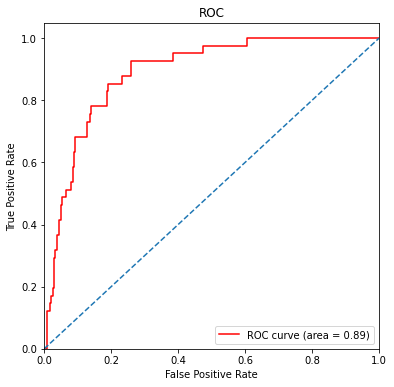

In [96]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# 2. 회귀

In [97]:
def rmse(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

metrics = {'MSE': mean_squared_error,
              'RMSE': mean_absolute_error,
              'MAE': rmse,
              'R2': r2_score}

def linear_eval(model):
    for i in metrics.keys():
        print(f'{i} : {metrics[i](y_test_, model.predict(X_test_))}')

## 선형 모델 (6.5 기준)

In [98]:
lr = LinearRegression()
lr.fit(X_train_, y_train_)
linear_eval(lr)

MSE : 0.37959710850229783
RMSE : 0.48139673183329795
MAE : 0.6161145254758225
R2 : 0.3468858137200871


In [99]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train_, y_train_)
linear_eval(ridge)

MSE : 0.3795970406146914
RMSE : 0.4813967058727731
MAE : 0.6161144703824861
R2 : 0.3468859305238189


In [100]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_, y_train_)
linear_eval(lasso)

MSE : 0.3784675443075926
RMSE : 0.4812691170602232
MAE : 0.6151971588910279
R2 : 0.34882928057837415


## Support Vector Regressor(SVR)

In [101]:
svr = SVR(kernel='rbf',gamma='auto',C=1, epsilon=0.1)
svr.fit(X_train_, y_train_)
linear_eval(svr)

MSE : 0.33437518713082554
RMSE : 0.4293437239999129
MAE : 0.5782518371184181
R2 : 0.4246921976914354
